# 1. Exploratory analysis
Краткий EDA: загрузка данных, базовые графики, автокорреляция, простые признаки

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 5)

In [6]:
data_path = "../data/user_activity.csv"

df = pd.read_csv(data_path)
display(df.head())
display(df.shape)
display(df.dtypes)

,timestamp,user_activity
0,2025-01-01 00:00:00,97.750281
1,2025-01-01 01:00:00,103.011182
2,2025-01-01 02:00:00,111.496654
3,2025-01-01 03:00:00,109.504332
4,2025-01-01 04:00:00,107.548266


(2160, 2)

timestamp         object
user_activity    float64
dtype: object

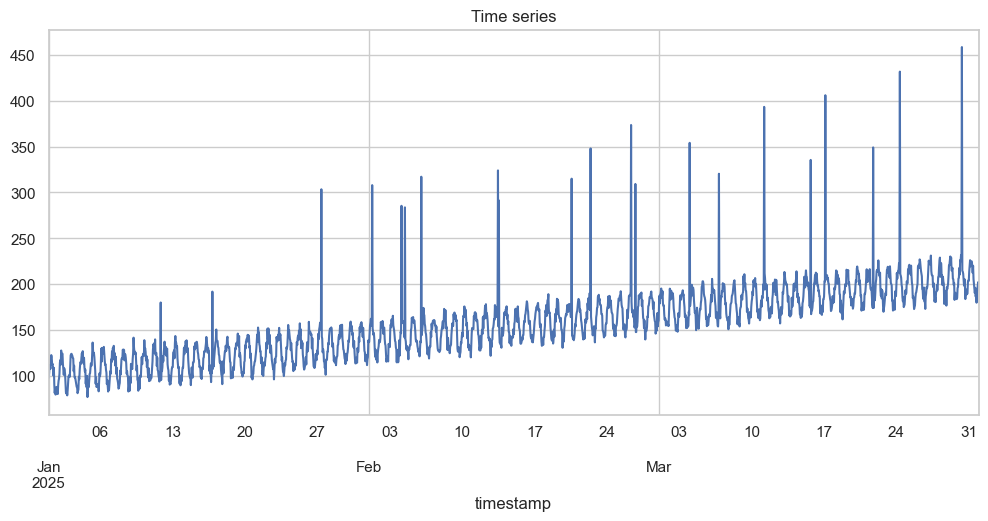

In [7]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values("timestamp").set_index("timestamp")

ts = df["user_activity"].astype(float)

ts.plot(title="Time series")
plt.show()

## Скользящие средние / тренд

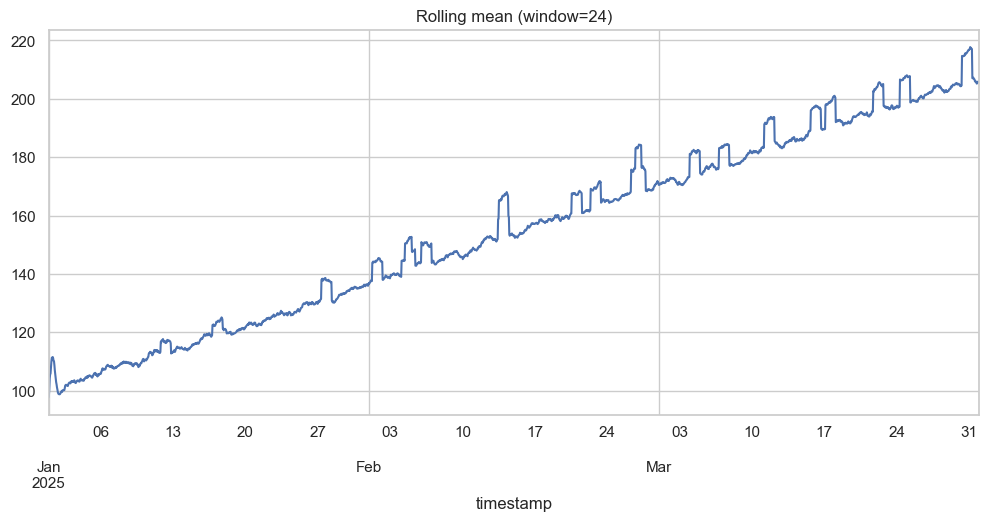

In [8]:
ts.rolling(window=24, min_periods=1).mean().plot(title="Rolling mean (window=24)")
plt.show()

## Распределение и описательная статистика

count    2160.000000
mean      155.682961
std        38.812404
min        76.692179
25%       127.381491
50%       154.853867
75%       182.173203
max       458.710577
Name: user_activity, dtype: float64

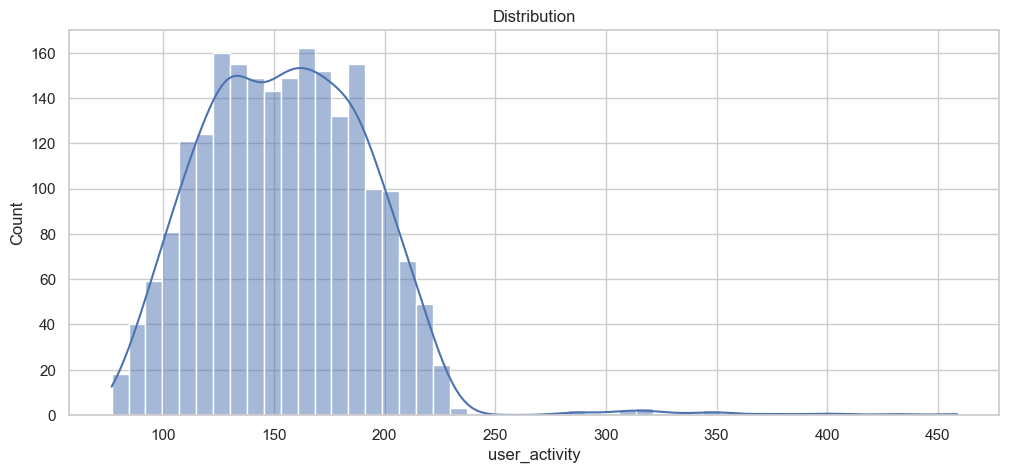

In [9]:
display(ts.describe())
sns.histplot(ts, bins=50, kde=True)
plt.title("Distribution")
plt.show()

## Автокорреляция (ACF) и лаги

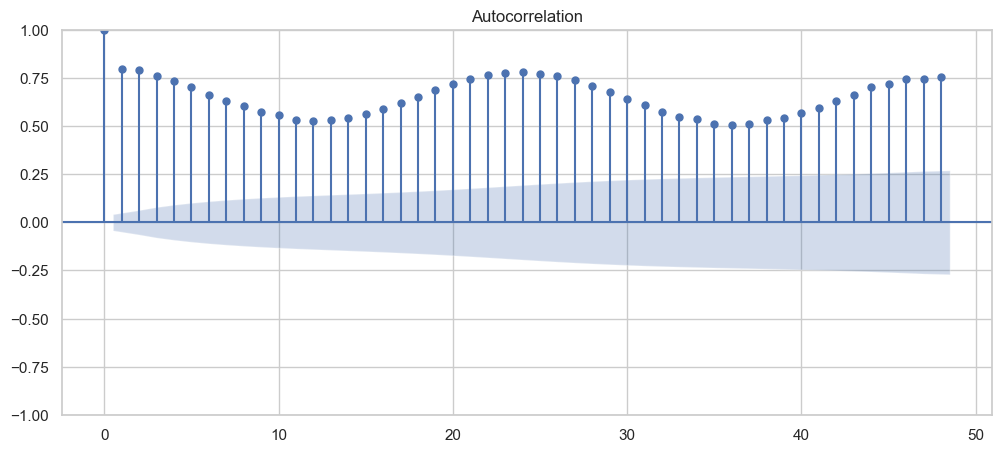

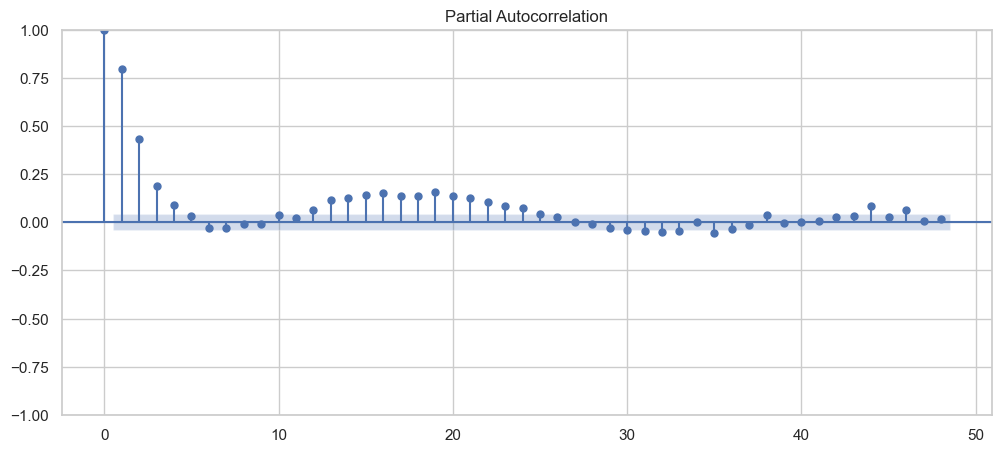

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts.dropna(), lags=48)
plt.show()
plot_pacf(ts.dropna(), lags=48)
plt.show()

## Простейшие признаки: лаги, rolling mean, временные признаки

In [11]:
df_feats = pd.DataFrame({"y": ts})
for lag in (1, 24, 48):
    df_feats[f"lag_{lag}"] = df_feats["y"].shift(lag)

df_feats["rolling_24"] = df_feats["y"].rolling(24, min_periods=1).mean()
df_feats["hour"] = df.index.hour
df_feats["dayofweek"] = df.index.dayofweek

display(df_feats.tail(10))

,y,lag_1,lag_24,lag_48,rolling_24,hour,dayofweek
timestamp,,,,,,,
2025-03-31 14:00:00,190.210073,194.920648,205.466901,201.326955,206.005070,14,0
2025-03-31 15:00:00,195.956323,190.210073,199.248463,182.769771,205.867897,15,0
2025-03-31 16:00:00,186.464111,195.956323,183.671283,190.672429,205.984265,16,0
2025-03-31 17:00:00,189.829240,186.464111,193.669625,190.184884,205.824249,17,0
2025-03-31 18:00:00,179.717631,189.829240,194.088930,186.673540,205.225445,18,0
2025-03-31 19:00:00,190.461044,179.717631,188.639620,188.334340,205.301337,19,0
2025-03-31 20:00:00,194.136139,190.461044,189.870065,183.591231,205.479090,20,0
2025-03-31 21:00:00,199.543900,194.136139,189.704470,184.932982,205.889067,21,0
2025-03-31 22:00:00,202.199959,199.543900,202.422869,195.663364,205.879779,22,0


In [13]:
df_feats.to_csv("../data/features.csv", index=True)
